In [1]:
!pip install rdkit openmm prolif py3Dmol

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.7/108.7 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.9/34.9 MB 37.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 32.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 39.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 58.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.0/45.0 kB 3.3 MB/s eta 0:00:00


In [2]:
!pip install mdtraj

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 49.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.3/9.3 MB 110.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 76.1 MB/s eta 0:00:00


In [3]:
!pip install python-docx

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.3/244.3 kB 3.6 MB/s eta 0:00:00


In [4]:
from google.colab import files
uploaded = files.upload() # Selecciona el archivo desde tu computadora
pdb_path = next(iter(uploaded.keys())) # Obtiene el nombre del archivo subido

Saving ndm1_fixed.pdb to ndm1_fixed.pdb


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

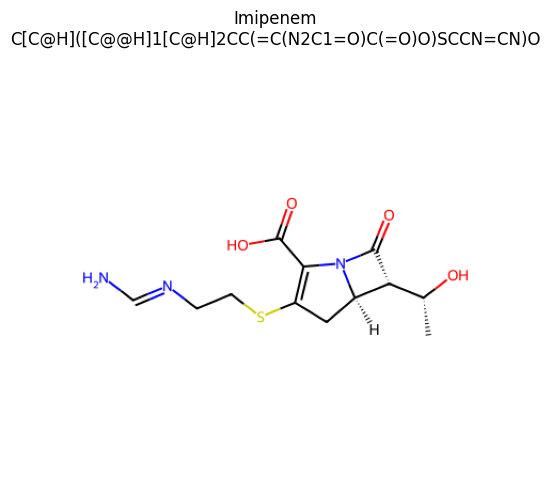

In [5]:
"""
# 1: Visualización de NDM-1 e Imipenem (2D)

Simulación inicial del mecanismo de acción del antibiótico **Imipenem** frente a la enzima **NDM-1**, responsable de degradar el anillo β-lactámico. Esta celda visualiza la enzima y la estructura 2D del antibiótico.
"""

# %%
import os
import matplotlib.pyplot as plt
from rdkit import Chem
from rdkit.Chem import Draw
import py3Dmol

# Crear carpeta de resultados
RESULTS_DIR = "./Resultados_Examen"
os.makedirs(RESULTS_DIR, exist_ok=True)

# Visualizar enzima NDM-1
def visualizar_ndm1():
    with open('ndm1_fixed.pdb') as f:
        pdb_data = f.read()
    view = py3Dmol.view(width=800, height=600)
    view.addModel(pdb_data, 'pdb')
    view.setStyle({'cartoon': {'color': 'spectrum'}})
    view.addStyle({'elem': 'Zn'}, {'sphere': {'color': 'silver', 'radius': 1.5}})
    view.zoomTo()
    return view

ndm1_view = visualizar_ndm1()
ndm1_view.show()

# SMILES correctos
imipenem_smiles = "C[C@H]([C@@H]1[C@H]2CC(=C(N2C1=O)C(=O)O)SCCN=CN)O"
# meropenem_smiles = "C[C@H]([C@H]1C(=O)N2[C@@H]1[C@@H](C)C(=C2C(=O)O)S[C@@H]1CN[C@@H](C1)C(=O)N(C)C)O"

# Crear moléculas
imipenem_mol = Chem.MolFromSmiles(imipenem_smiles)

# Generar imagen 2D clara
imipenem_img = Draw.MolToImage(imipenem_mol, size=(400, 400))

# Guardar imagen
imipenem_img.save(os.path.join(RESULTS_DIR, "imipenem_2d.png"))

# Mostrar con matplotlib
plt.figure(figsize=(5, 5))
plt.imshow(imipenem_img)
plt.title('Imipenem\n' + imipenem_smiles)
plt.axis('off')
plt.tight_layout()
plt.show()

Molécula Original cargada correctamente
Molécula Esterico cargada correctamente
Molécula Quelante cargada correctamente

Visualización 2D de las moléculas:


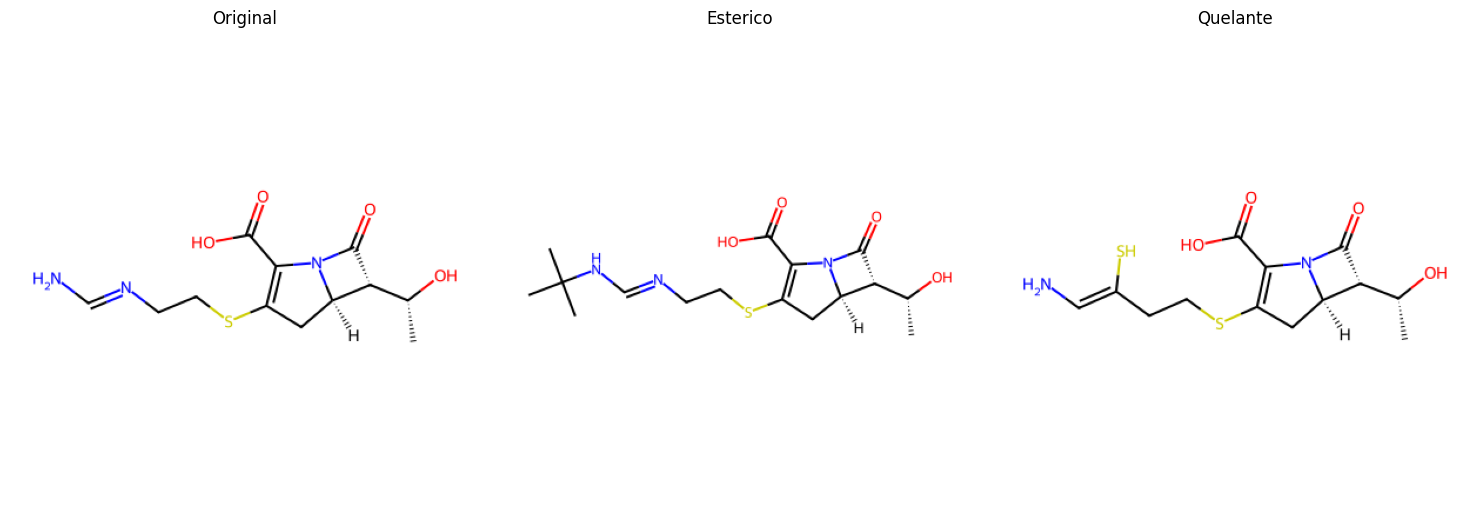


Generando estructuras 3D...
Archivo 3D generado para Original: /content/imipenem_modifications/imipenem_Original_3d.pdb
Archivo 3D generado para Esterico: /content/imipenem_modifications/imipenem_Esterico_3d.pdb
Archivo 3D generado para Quelante: /content/imipenem_modifications/imipenem_Quelante_3d.pdb

Visualización 3D interactiva:

Molécula: Original


3Dmol.js failed to load for some reason. Please check your browser console for error messages.


Molécula: Esterico


3Dmol.js failed to load for some reason. Please check your browser console for error messages.


Molécula: Quelante


3Dmol.js failed to load for some reason. Please check your browser console for error messages.


Todos los archivos guardados en: /content/imipenem_modifications


In [6]:
"""
# 2: Visualización estructural clara de Imipenem original y modificados

Estas imagenes servirán para el informe y análisis estructural.
"""

# %%
import os
from rdkit import Chem
from rdkit.Chem import AllChem, Draw
import matplotlib.pyplot as plt
import py3Dmol  # Para visualización 3D interactiva
from IPython.display import display, HTML  # Para mostrar las visualizaciones en notebooks

# Directorio para guardar los resultados
RESULTS_DIR = "./imipenem_modifications"
os.makedirs(RESULTS_DIR, exist_ok=True)

# 1. SMILES del Imipenem original y modificaciones
imipenem_smiles = {
    "Original": "C[C@H]([C@@H]1[C@H]2CC(=C(N2C1=O)C(=O)O)SCCN=CN)O",
    "Esterico": "C[C@H]([C@@H]1[C@H]2CC(=C(N2C1=O)C(=O)O)SCCN=C(N(C(C)(C)C)))O",
    "Quelante": "C[C@H]([C@@H]1[C@H]2CC(=C(N2C1=O)C(=O)O)SCCC(S)=CN)O"
}

# 2. Generar moléculas y manejar errores
mols = {}
for name, smiles in imipenem_smiles.items():
    mol = Chem.MolFromSmiles(smiles)
    if mol:
        mols[name] = mol
        print(f"Molécula {name} cargada correctamente")
    else:
        print(f"Error al cargar la molécula {name}")

# 3. Visualización 2D
print("\nVisualización 2D de las moléculas:")
plt.figure(figsize=(15, 5))
for i, (name, mol) in enumerate(mols.items(), 1):
    plt.subplot(1, 3, i)
    img = Draw.MolToImage(mol, size=(400, 400))
    plt.imshow(img)
    plt.title(name.capitalize())
    plt.axis('off')
    # Guardar imagen 2D
    img.save(os.path.join(RESULTS_DIR, f"imipenem_{name}_2d.png"))
plt.tight_layout()
plt.show()

# 4. Generar y guardar estructuras 3D en formato PDB
print("\nGenerando estructuras 3D...")
for name, mol in mols.items():
    if mol:
        # Añadir hidrógenos
        mol = Chem.AddHs(mol)
        # Generar conformación 3D
        AllChem.EmbedMolecule(mol)
        AllChem.MMFFOptimizeMolecule(mol)
        # Guardar como PDB
        pdb_file = os.path.join(RESULTS_DIR, f"imipenem_{name}_3d.pdb")
        Chem.MolToPDBFile(mol, pdb_file)
        print(f"Archivo 3D generado para {name}: {os.path.abspath(pdb_file)}")

# 5. Visualización 3D interactiva
print("\nVisualización 3D interactiva:")
for name in mols.keys():
    pdb_file = os.path.join(RESULTS_DIR, f"imipenem_{name}_3d.pdb")
    if os.path.exists(pdb_file):
        print(f"\nMolécula: {name}")
        view = py3Dmol.view(width=400, height=300)
        with open(pdb_file) as f:
            view.addModel(f.read(), 'pdb')
        view.setStyle({'stick': {}})
        view.zoomTo()
        view.show()
    else:
        print(f"No se encontró el archivo PDB para {name}")

print(f"\nTodos los archivos guardados en: {os.path.abspath(RESULTS_DIR)}")


Generando estructura para Original...
Estructura 3D guardada en ./results_funcionalidad_ndm1/original.pdb
Imagen 2D guardada en ./results_funcionalidad_ndm1/original_2d.png

Generando estructura para Estérico...
Estructura 3D guardada en ./results_funcionalidad_ndm1/estérico.pdb
Imagen 2D guardada en ./results_funcionalidad_ndm1/estérico_2d.png

Generando estructura para Quelante...
Estructura 3D guardada en ./results_funcionalidad_ndm1/quelante.pdb
Imagen 2D guardada en ./results_funcionalidad_ndm1/quelante_2d.png

Analizando interacciones para Original...
Análisis completado para Original

Analizando interacciones para Estérico...
Análisis completado para Estérico

Analizando interacciones para Quelante...
Análisis completado para Quelante

Generando visualización avanzada...


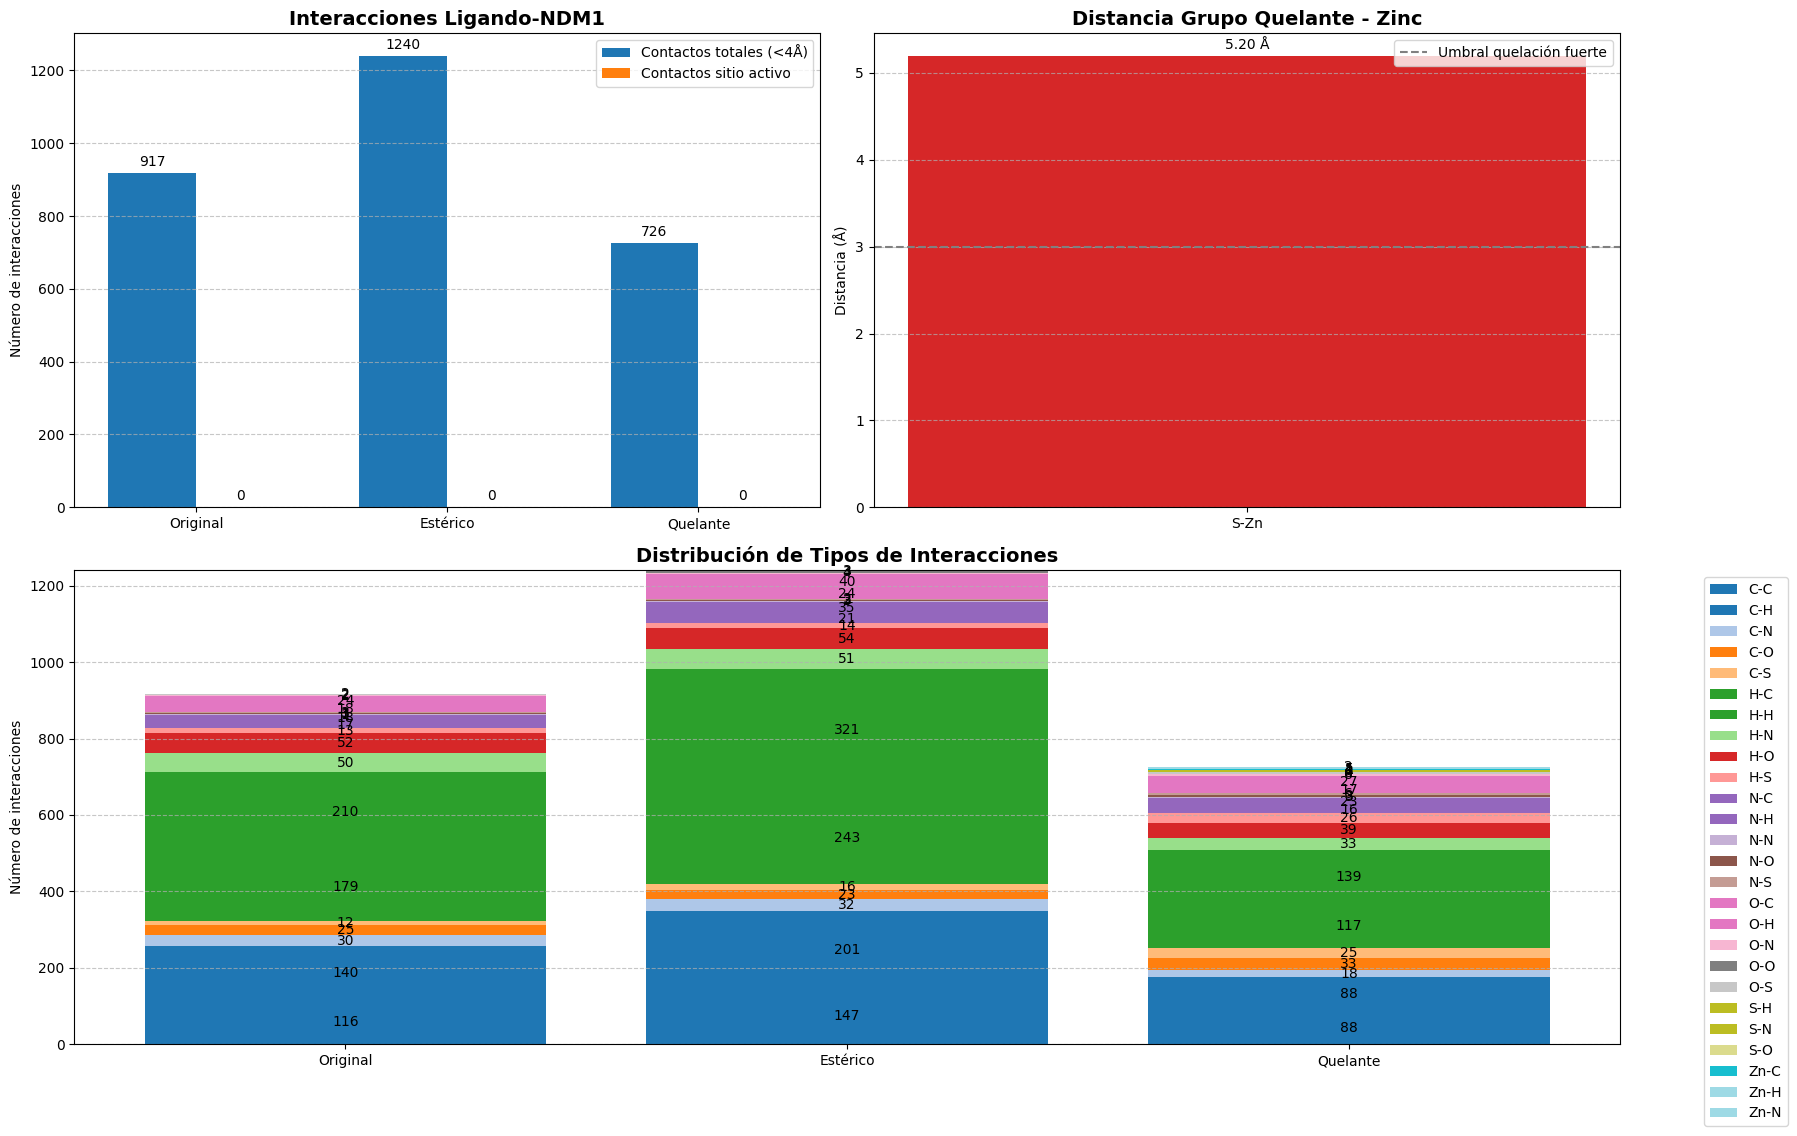

Visualización guardada en ./results_funcionalidad_ndm1/analisis_avanzado.png

Generando visualizaciones 3D personalizadas para cada complejo...
Visualización 3D para Original guardada en ./results_funcionalidad_ndm1/3d_complex_original.html
Visualización 3D para Estérico guardada en ./results_funcionalidad_ndm1/3d_complex_estérico.html
Visualización 3D para Quelante guardada en ./results_funcionalidad_ndm1/3d_complex_quelante.html

Resultados detallados guardados en ./results_funcionalidad_ndm1/resultados_detallados.json

=== RESUMEN EJECUTIVO ===

**Original**
- Contactos totales: 917
- Contactos con sitio activo: 0
- Tipos de interacciones:
  • C-O: 25
  • H-C: 179
  • H-O: 52
  • H-H: 210
  • C-C: 116
  • H-N: 50
  • N-H: 18
  • C-H: 140
  • C-N: 30
  • O-C: 18
  • O-H: 24
  • O-N: 2
  • N-C: 17
  • N-O: 3
  • O-O: 2
  • C-S: 12
  • H-S: 13
  • N-S: 3
  • O-S: 2
  • N-N: 1

**Estérico**
- Contactos totales: 1240
- Contactos con sitio activo: 0
- Tipos de interacciones:
  • N-H: 35
 

In [9]:
import os
import json
import numpy as np
from rdkit import Chem
from rdkit.Chem import AllChem, Draw
import mdtraj as md
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from collections import Counter
import py3Dmol  # Nueva librería para visualización 3D

# Configuración inicial
RESULTS_DIR = "./results_funcionalidad_ndm1"
os.makedirs(RESULTS_DIR, exist_ok=True)

# ---------------------------------------------------------------
# 1. DEFINICIÓN DE MOLÉCULAS CON SMILES VALIDADOS
# ---------------------------------------------------------------

smiles_dict = {
    "Original": "CC1C2CC(=C(N2C1=O)C(=O)O)SCCN=CN",
    "Estérico": "CC1C2CC(=C(N2C1=O)C(=O)O)SC(C(C)(C)C)CN=CN",
    "Quelante": "CC1C2CC(=C(N2C1=O)C(=O)O)SCC(S)N=CN"
}

# ---------------------------------------------------------------
# 2. GENERACIÓN DE ESTRUCTURAS 3D ROBUSTA
# ---------------------------------------------------------------

def safe_mol_from_smiles(smiles, name):
    """Crea molécula RDKit con manejo de errores mejorado"""
    params = Chem.SmilesParserParams()
    params.removeHs = False

    try:
        mol = Chem.MolFromSmiles(smiles, params)
        if mol is None:
            # Intento alternativo eliminando posibles problemas
            clean_smiles = smiles.replace('[C@H]', 'C').replace('[C@@H]', 'C')
            mol = Chem.MolFromSmiles(clean_smiles, params)
            if mol is None:
                raise ValueError(f"No se pudo parsear SMILES para {name}")
        return mol
    except Exception as e:
        print(f"Error procesando SMILES para {name}: {str(e)}")
        return None

def generate_3d_structure(smiles, name):
    """Genera estructura 3D con múltiples validaciones"""
    print(f"\nGenerando estructura para {name}...")

    mol = safe_mol_from_smiles(smiles, name)
    if mol is None:
        return None

    # Añadir hidrógenos
    mol = Chem.AddHs(mol)

    # Embedding 3D con múltiples intentos
    for attempt in range(3):
        try:
            AllChem.EmbedMolecule(mol, AllChem.ETKDG())
            break
        except:
            if attempt == 2:
                print(f"Error en embedding 3D para {name}")
                return None

    # Optimización
    try:
        AllChem.MMFFOptimizeMolecule(mol)
    except:
        try:
            AllChem.UFFOptimizeMolecule(mol)
        except Exception as e:
            print(f"Error optimizando {name}: {str(e)}")
            return None

    # Guardar PDB
    pdb_path = os.path.join(RESULTS_DIR, f"{name.lower()}.pdb")
    Chem.MolToPDBFile(mol, pdb_path)
    print(f"Estructura 3D guardada en {pdb_path}")

    # Visualización 2D
    try:
        img = Draw.MolToImage(mol, size=(400, 300))
        img_path = os.path.join(RESULTS_DIR, f"{name.lower()}_2d.png")
        img.save(img_path)
        print(f"Imagen 2D guardada en {img_path}")
    except:
        print("No se pudo generar imagen 2D")

    return pdb_path

# Generar todas las estructuras
pdb_paths = {}
for name, smiles in smiles_dict.items():
    path = generate_3d_structure(smiles, name)
    if path:
        pdb_paths[name] = path

# ---------------------------------------------------------------
# 3. ANÁLISIS DE INTERACCIONES MEJORADO
# ---------------------------------------------------------------

def analyze_interactions(pdb_prot, pdb_lig, name):
    """Analiza interacciones con métricas mejoradas"""
    print(f"\nAnalizando interacciones para {name}...")

    try:
        prot = md.load(pdb_prot)
        lig = md.load(pdb_lig)
    except Exception as e:
        print(f"Error cargando archivos: {e}")
        return None

    # Identificar zinc en la proteína
    zinc_atoms = [a.index for a in prot.topology.atoms if a.element.symbol == 'Zn']
    zinc_coord = prot.xyz[0][zinc_atoms[0]] if zinc_atoms else None

    # Posicionamiento inteligente
    lig_xyz = lig.xyz.copy()
    if name == "Quelante" and zinc_coord is not None:
        sulfur_atoms = [a.index for a in lig.topology.atoms if a.element.symbol == 'S']
        if len(sulfur_atoms) > 1:
            s_coord = lig.xyz[0][sulfur_atoms[-1]]
            translation = zinc_coord - s_coord + np.array([0.3, 0.3, 0.3])
            lig_xyz += translation

    # Construir complejo
    complex_top = prot.topology.join(lig.topology)
    complex_xyz = np.concatenate([prot.xyz[0], lig_xyz[0]])[np.newaxis, :]
    complex_traj = md.Trajectory(complex_xyz, complex_top)

    # Guardar complejo para visualización 3D
    complex_pdb = os.path.join(RESULTS_DIR, f"complex_{name.lower()}.pdb")
    complex_traj.save_pdb(complex_pdb)

    # Definir átomos
    prot_atoms = list(range(prot.n_atoms))
    lig_atoms = list(range(prot.n_atoms, prot.n_atoms + lig.n_atoms))

    # Residuos clave del sitio activo (ajustar según estructura real)
    active_site_resids = [120, 121, 122, 123, 124, 189, 190, 208]
    active_site_atoms = [a.index for a in complex_top.atoms
                        if a.residue.resSeq in active_site_resids and a.index in prot_atoms]

    # Calcular todas las distancias
    pairs_all = np.array([[i, j] for i in prot_atoms for j in lig_atoms])
    dist_all = md.compute_distances(complex_traj, pairs_all)[0]

    # Métricas clave
    metrics = {
        'contactos_totales': int(np.sum(dist_all < 0.4)),  # <4Å
        'contactos_sitio_activo': int(np.sum(dist_all[[i for i,p in enumerate(pairs_all)
                                            if p[0] in active_site_atoms]] < 0.4)),
        'distancia_zinc': None,
        'interacciones_por_tipo': {},
        'complex_pdb': complex_pdb  # Guardamos la ruta para visualización
    }

    # Análisis específico para quelantes
    if name == "Quelante" and zinc_atoms:
        sulfur_atoms = [a.index for a in lig.topology.atoms if a.element.symbol == 'S']
        if len(sulfur_atoms) > 1:
            s_idx = prot.n_atoms + sulfur_atoms[-1]
            zinc_pairs = np.array([[s_idx, zn] for zn in zinc_atoms])
            zinc_dists = md.compute_distances(complex_traj, zinc_pairs)[0] * 10  # Convertir a Å
            metrics['distancia_zinc'] = float(np.min(zinc_dists))

    # Identificar tipos de interacciones
    elements_in_contact = []
    for i, dist in enumerate(dist_all):
        if dist < 0.4:
            prot_atom = complex_top.atom(pairs_all[i][0])
            lig_atom = complex_top.atom(pairs_all[i][1])
            elements_in_contact.append(f"{prot_atom.element.symbol}-{lig_atom.element.symbol}")

    metrics['interacciones_por_tipo'] = dict(Counter(elements_in_contact))

    print(f"Análisis completado para {name}")
    return metrics

# ---------------------------------------------------------------
# NUEVA FUNCIÓN: VISUALIZACIÓN 3D DE COMPLEJOS (ACTUALIZADA)
# ---------------------------------------------------------------

def visualize_3d_complexes(resultados):
    """Genera visualizaciones 3D interactivas personalizadas para cada complejo"""
    print("\nGenerando visualizaciones 3D personalizadas para cada complejo...")

    for name, res in resultados.items():
        if 'complex_pdb' not in res:
            continue

        # Cargar el archivo PDB del complejo
        with open(res['complex_pdb'], 'r') as f:
            pdb_data = f.read()

        # Configurar vista 3D
        view = py3Dmol.view(width=800, height=600)
        view.addModel(pdb_data, 'pdb')

        # Estilo base para la proteína
        view.setStyle({'model': -1},
                     {'cartoon': {'color': 'spectrum'}})

        # Configuraciones específicas para cada tipo de imipenem
        if name == "Original":
            # Estilo para imipenem original
            view.setStyle({'resn': 'UNL'},  # Ligando
                         {'stick': {'colorscheme': 'greenCarbon', 'radius': 0.3}})
            view.addLabel("Imipenem Original",
                        {'fontColor':'black', 'backgroundColor':'white',
                         'backgroundOpacity':0.8, 'position':{'x':50, 'y':10}})

        elif name == "Estérico":
            # Estilo para imipenem estérico - resaltar grupo voluminoso
            view.setStyle({'resn': 'UNL'},
                         {'stick': {'colorscheme': 'cyanCarbon', 'radius': 0.3}})
            # Resaltar el grupo t-butilo
            view.setStyle({'resn': 'UNL', 'elem': 'C', 'within': {'distance': 3, 'resn': 'UNL'}},
                         {'stick': {'colorscheme': 'magentaCarbon', 'radius': 0.4}})
            view.addLabel("Imipenem Estérico (grupo t-butilo en magenta)",
                        {'fontColor':'black', 'backgroundColor':'white',
                         'backgroundOpacity':0.8, 'position':{'x':50, 'y':10}})

        elif name == "Quelante":
            # Estilo para imipenem quelante - resaltar grupos sulfhidrilo
            view.setStyle({'resn': 'UNL'},
                         {'stick': {'colorscheme': 'orangeCarbon', 'radius': 0.3}})
            # Resaltar átomos de azufre
            view.setStyle({'resn': 'UNL', 'elem': 'S'},
                         {'sphere': {'color': 'yellow', 'radius': 0.5}})
            # Mostrar interacción con zinc si existe
            if res.get('distancia_zinc'):
                view.addDistance({'model': -1, 'elem': 'Zn'},
                               {'model': -1, 'elem': 'S', 'resn': 'UNL'},
                               {'color': 'red', 'dashed': True, 'radius': 0.2})
            view.addLabel("Imipenem Quelante (grupos SH en amarillo)",
                        {'fontColor':'black', 'backgroundColor':'white',
                         'backgroundOpacity':0.8, 'position':{'x':50, 'y':10}})

        # Resaltar átomos de zinc en todos los casos
        view.setStyle({'elem': 'Zn'},
                     {'sphere': {'color': 'gold', 'radius': 1.2}})

        # Añadir etiqueta para los zinc
        view.addLabel("Átomo de Zinc",
                    {'fontColor':'black', 'backgroundColor':'white',
                     'backgroundOpacity':0.8, 'position':{'x':50, 'y':30}})

        # Ajustes finales de visualización
        view.zoomTo({'resn': 'UNL'})  # Centrar en el ligando
        view.zoom(1.5)  # Un poco más de zoom
        view.spin(True)  # Rotación automática

        # Guardar como HTML
        html_path = os.path.join(RESULTS_DIR, f"3d_complex_{name.lower()}.html")
        with open(html_path, 'w') as f:
            f.write(view._make_html())

        print(f"Visualización 3D para {name} guardada en {html_path}")

# ---------------------------------------------------------------
# 4. VISUALIZACIÓN AVANZADA DE RESULTADOS
# ---------------------------------------------------------------

def plot_advanced_results(results):
    """Visualización mejorada con múltiples métricas"""
    print("\nGenerando visualización avanzada...")

    fig = plt.figure(figsize=(18, 12))
    gs = fig.add_gridspec(2, 2)

    # Gráfico 1: Contactos totales vs sitio activo
    ax1 = fig.add_subplot(gs[0, 0])
    names = list(results.keys())
    contactos_tot = [r['contactos_totales'] for r in results.values()]
    contactos_sitio = [r['contactos_sitio_activo'] for r in results.values()]

    x = np.arange(len(names))
    width = 0.35
    bars1 = ax1.bar(x - width/2, contactos_tot, width, label='Contactos totales (<4Å)', color='#1f77b4')
    bars2 = ax1.bar(x + width/2, contactos_sitio, width, label='Contactos sitio activo', color='#ff7f0e')

    # Añadir valores
    for bars in [bars1, bars2]:
        for bar in bars:
            height = bar.get_height()
            ax1.annotate(f'{height}',
                        xy=(bar.get_x() + bar.get_width() / 2, height),
                        xytext=(0, 3),
                        textcoords="offset points",
                        ha='center', va='bottom')

    ax1.set_title('Interacciones Ligando-NDM1', fontsize=14, fontweight='bold')
    ax1.set_ylabel('Número de interacciones')
    ax1.set_xticks(x)
    ax1.set_xticklabels(names)
    ax1.legend()
    ax1.grid(axis='y', linestyle='--', alpha=0.7)

    # Gráfico 2: Distancia S-Zn para quelante
    ax2 = fig.add_subplot(gs[0, 1])
    if results.get('Quelante', {}).get('distancia_zinc'):
        dist = results['Quelante']['distancia_zinc']
        color = '#2ca02c' if dist and dist < 3.0 else '#d62728'
        bar = ax2.bar(['S-Zn'], [dist], color=color)
        ax2.axhline(3.0, color='gray', linestyle='--', label='Umbral quelación fuerte')

        ax2.annotate(f'{dist:.2f} Å',
                    xy=(bar[0].get_x() + bar[0].get_width() / 2, dist),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

        ax2.set_title('Distancia Grupo Quelante - Zinc', fontsize=14, fontweight='bold')
        ax2.set_ylabel('Distancia (Å)')
        ax2.legend()
        ax2.grid(axis='y', linestyle='--', alpha=0.7)

    # Gráfico 3: Tipos de interacciones
    ax3 = fig.add_subplot(gs[1, :])
    interaction_types = sorted(set().union(*[r['interacciones_por_tipo'].keys() for r in results.values()]))

    colors = plt.cm.tab20(np.linspace(0, 1, len(interaction_types)))
    legend_elements = []

    bottom = np.zeros(len(names))
    for i, itype in enumerate(interaction_types):
        counts = [res['interacciones_por_tipo'].get(itype, 0) for res in results.values()]
        bars = ax3.bar(names, counts, bottom=bottom, color=colors[i])
        bottom += counts

        # Añadir etiquetas
        for bar, val in zip(bars, counts):
            if val > 0:
                ax3.annotate(f'{val}',
                           xy=(bar.get_x() + bar.get_width() / 2, bar.get_y() + bar.get_height() / 2),
                           xytext=(0, 0),
                           textcoords="offset points",
                           ha='center', va='center')

        legend_elements.append(Patch(facecolor=colors[i], label=itype))

    ax3.set_title('Distribución de Tipos de Interacciones', fontsize=14, fontweight='bold')
    ax3.set_ylabel('Número de interacciones')
    ax3.legend(handles=legend_elements, bbox_to_anchor=(1.05, 1), loc='upper left')
    ax3.grid(axis='y', linestyle='--', alpha=0.7)

    plt.tight_layout()
    plot_path = os.path.join(RESULTS_DIR, "analisis_avanzado.png")
    plt.savefig(plot_path, bbox_inches='tight')
    plt.show()
    print(f"Visualización guardada en {plot_path}")

# ---------------------------------------------------------------
# 5. EJECUCIÓN PRINCIPAL
# ---------------------------------------------------------------

def main():
    # Archivo PDB de la enzima NDM-1
    ndm1_pdb = "ndm1_fixed.pdb"

    if not os.path.exists(ndm1_pdb):
        print(f"\nError: Archivo de proteína {ndm1_pdb} no encontrado")
        return

    # Ejecutar análisis completo
    resultados = {}
    for name, pdb_lig in pdb_paths.items():
        if pdb_lig:
            resultados[name] = analyze_interactions(ndm1_pdb, pdb_lig, name)

    if not resultados:
        print("\nNo se generaron resultados válidos")
        return

    # Visualización y guardado
    plot_advanced_results(resultados)
    visualize_3d_complexes(resultados)  # Nueva función para visualización 3D

    # Guardar resultados detallados
    resultados_file = os.path.join(RESULTS_DIR, "resultados_detallados.json")
    with open(resultados_file, 'w') as f:
        json.dump(resultados, f, indent=4)
    print(f"\nResultados detallados guardados en {resultados_file}")

    # Resumen ejecutivo
    print("\n=== RESUMEN EJECUTIVO ===")
    for name, res in resultados.items():
        print(f"\n**{name}**")
        print(f"- Contactos totales: {res['contactos_totales']}")
        print(f"- Contactos con sitio activo: {res['contactos_sitio_activo']}")
        if name == "Quelante" and res['distancia_zinc']:
            status = "EFECTIVA" if res['distancia_zinc'] < 3.0 else "SUBÓPTIMA"
            print(f"- Distancia S-Zn: {res['distancia_zinc']:.2f} Å ({status})")
        print("- Tipos de interacciones:")
        for itype, count in res['interacciones_por_tipo'].items():
            print(f"  • {itype}: {count}")

if __name__ == "__main__":
    main()
    print("\nAnálisis completado exitosamente!")